In [124]:
from __future__ import print_function
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import torch
import numpy as np
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [125]:

data = pd.read_csv('data_month10_21.csv',index_col= [0])
data0 = pd.read_csv('quant10_211231.csv',index_col= [0])

In [126]:
data

,calendarDate,isMonthEnd
28,2010-01-29,1
56,2010-02-26,1
89,2010-03-31,1
119,2010-04-30,1
150,2010-05-31,1
...,...,...
4260,2021-08-31,1
4290,2021-09-30,1
4319,2021-10-29,1
4351,2021-11-30,1


In [127]:
data0

,BIAS20,RSI,ARTDays,InventoryTDays,DebtsAssetRatio,NetProfitRatio,CurrentRatio,QuickRatio,ROE,ROA,...,GREC,DEGM,PB,CurrentRatio.1,FixedAssetsTRate,NetAssetGrowRate,return,stock,tradeDate,y_m
1,-0.331307,-0.705434,-0.208531,1.170825,0.618412,-1.124725,0.132599,-0.083816,-0.619467,-0.924125,...,-0.318926,-0.923607,-0.031993,1.9149,2.001165,-0.519659,-0.178947,000002.XSHE,2010-03-31,2010-03
2,-0.550150,-0.337192,1.976959,0.399902,0.095896,-0.039621,0.654599,0.640853,-0.126152,-0.196492,...,-0.245766,-0.009686,-1.003801,1.4190,1.053636,0.353969,-0.123529,000063.XSHE,2010-03-31,2010-03
3,0.395477,0.411495,0.136692,-2.074853,0.097339,1.273469,-2.084734,-1.404639,-0.617734,-0.066760,...,-0.603884,-0.620997,-0.336910,0.5273,-2.676749,0.098204,-0.213358,000069.XSHE,2010-03-31,2010-03
4,-1.307190,-1.586097,-0.099565,-0.182829,0.679621,0.153034,-0.088892,0.075800,0.662882,0.206668,...,-0.686706,-0.892604,0.122375,1.2669,1.086232,-0.730548,-0.171587,000100.XSHE,2010-03-31,2010-03
5,-0.185916,0.099987,0.653974,0.162349,-0.051154,0.149372,0.258439,0.209515,0.344638,-0.300041,...,0.147703,-0.378986,-0.618789,1.0491,-0.091994,0.142323,-0.148837,000157.XSHE,2010-03-31,2010-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,-1.192829,-0.818840,-1.120120,0.320324,-0.581058,-1.628643,0.645046,0.465729,-1.372375,-1.078898,...,0.933843,-0.580060,0.684695,4.6281,-0.503970,-1.502134,-0.036899,688363.XSHG,2021-11-30,2021-11
32545,0.653200,1.186856,-0.667875,-0.523708,-0.240327,-0.101306,-0.449497,-0.147728,-0.308076,-0.474197,...,-0.298068,1.244492,-0.701669,3.2623,-0.989956,0.288897,-0.097513,688396.XSHG,2021-11-30,2021-11
32546,0.315752,0.703975,2.213232,0.031686,-0.039631,-2.701112,-0.827972,-0.730158,-2.789219,-3.256669,...,-1.026673,1.794142,-0.805991,2.5502,-1.809674,-1.563069,-0.060483,688561.XSHG,2021-11-30,2021-11
32547,0.345915,0.359229,-0.987022,-0.052706,0.363221,0.526027,0.492931,0.283848,0.334268,0.468631,...,1.506374,-0.116970,0.463592,1.1896,0.061220,-0.638463,0.078901,688599.XSHG,2021-11-30,2021-11


In [128]:
data_end = map(lambda x: x[0:4]+x[5:7]+x[8:10], data['calendarDate'].values.tolist())

In [129]:
factor_names =['BIAS20','RSI','ARTDays','InventoryTDays','DebtsAssetRatio','NetProfitRatio','CurrentRatio','QuickRatio','ROE','ROA','PS','KlingerOscillator','PE', 'NetProfitGrowRate', 'MA10', 'MA60', 'LCAP', 'LFLO', 'NPToTOR', 'OperatingProfitGrowRate', 'TotalAssetGrowRate','DAREC','GREC','DEGM','PB' ,'CurrentRatio','FixedAssetsTRate','NetAssetGrowRate']

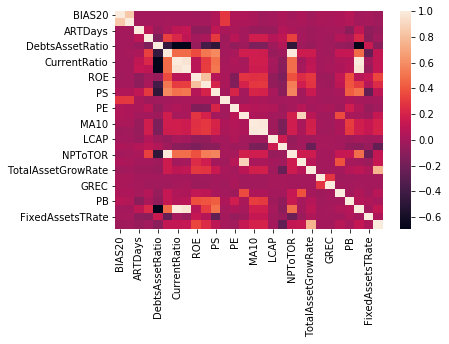

In [130]:
sns.heatmap(data0[factor_names].corr())

In [131]:



#收益率分类 每个月末交易日，前50%为1 ，后50%为0
rets=pd.DataFrame()
for d in data['calendarDate'].values[:]:
    
    
    
    lables = data0[data0['tradeDate']==d]['return']>=data0[data0['tradeDate']==d]['return'].mean()  #为分类处理数据，判断收盘价是否大于今日收盘价
    lables = lables.replace({True:'1',False:'0'})
    
    
    rets=pd.concat([rets,lables])
rets.columns=['rets']
data0=pd.concat([data0,rets],axis=1)    
df=data0
df


,BIAS20,RSI,ARTDays,InventoryTDays,DebtsAssetRatio,NetProfitRatio,CurrentRatio,QuickRatio,ROE,ROA,...,DEGM,PB,CurrentRatio.1,FixedAssetsTRate,NetAssetGrowRate,return,stock,tradeDate,y_m,rets
1,-0.331307,-0.705434,-0.208531,1.170825,0.618412,-1.124725,0.132599,-0.083816,-0.619467,-0.924125,...,-0.923607,-0.031993,1.9149,2.001165,-0.519659,-0.178947,000002.XSHE,2010-03-31,2010-03,0
2,-0.550150,-0.337192,1.976959,0.399902,0.095896,-0.039621,0.654599,0.640853,-0.126152,-0.196492,...,-0.009686,-1.003801,1.4190,1.053636,0.353969,-0.123529,000063.XSHE,2010-03-31,2010-03,0
3,0.395477,0.411495,0.136692,-2.074853,0.097339,1.273469,-2.084734,-1.404639,-0.617734,-0.066760,...,-0.620997,-0.336910,0.5273,-2.676749,0.098204,-0.213358,000069.XSHE,2010-03-31,2010-03,0
4,-1.307190,-1.586097,-0.099565,-0.182829,0.679621,0.153034,-0.088892,0.075800,0.662882,0.206668,...,-0.892604,0.122375,1.2669,1.086232,-0.730548,-0.171587,000100.XSHE,2010-03-31,2010-03,0
5,-0.185916,0.099987,0.653974,0.162349,-0.051154,0.149372,0.258439,0.209515,0.344638,-0.300041,...,-0.378986,-0.618789,1.0491,-0.091994,0.142323,-0.148837,000157.XSHE,2010-03-31,2010-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,-1.192829,-0.818840,-1.120120,0.320324,-0.581058,-1.628643,0.645046,0.465729,-1.372375,-1.078898,...,-0.580060,0.684695,4.6281,-0.503970,-1.502134,-0.036899,688363.XSHG,2021-11-30,2021-11,0
32545,0.653200,1.186856,-0.667875,-0.523708,-0.240327,-0.101306,-0.449497,-0.147728,-0.308076,-0.474197,...,1.244492,-0.701669,3.2623,-0.989956,0.288897,-0.097513,688396.XSHG,2021-11-30,2021-11,0
32546,0.315752,0.703975,2.213232,0.031686,-0.039631,-2.701112,-0.827972,-0.730158,-2.789219,-3.256669,...,1.794142,-0.805991,2.5502,-1.809674,-1.563069,-0.060483,688561.XSHG,2021-11-30,2021-11,0
32547,0.345915,0.359229,-0.987022,-0.052706,0.363221,0.526027,0.492931,0.283848,0.334268,0.468631,...,-0.116970,0.463592,1.1896,0.061220,-0.638463,0.078901,688599.XSHG,2021-11-30,2021-11,1


In [132]:
del df['stock']

In [133]:
del df['tradeDate']

In [134]:
del df['y_m']

In [135]:
train_feature = df.iloc[:,:-1]

In [136]:
features = train_feature.copy()

In [13]:
train_label = df.iloc[:,-1]

In [14]:
train_label.shape

(23676,)

In [15]:
train_feature = torch.tensor(np.array(train_feature),dtype = torch.float32)

In [16]:
train_feature[0]

tensor([-0.3313, -0.7054, -0.2085,  1.1708,  0.6184, -1.1247,  0.1326, -0.0838,
        -0.6195, -0.9241, -0.5944,  1.0638, -0.0120, -0.2131, -0.6159, -0.6136,
        -0.7337, -0.1605, -1.1173, -0.3295, -0.8042,  0.1749, -0.3189, -0.9236,
        -0.0320,  1.9149,  2.0012, -0.5197, -0.1789])

In [17]:
train_label = torch.tensor(np.array(train_label,dtype = np.compat.long))
len(train_label)

23676

In [52]:
class MyData(Dataset):
    def __init__(self, dataset,label,mode):
        super(MyData, self).__init__()
        self.datas = dataset
        self.labels = label
        if mode == 'train':
            self.datas = self.datas[0:int(len(self.datas)*0.6)]
            self.labels = self.labels[0:int(len(self.labels)*0.6)]
        elif mode == "val":
            self.datas = self.datas[int(len(self.datas)*0.6):]
            self.labels = self.labels[int(len(self.labels)*0.6):]
        else:
            self.datas = dataset
            self.labels = label
            
        
    def __getitem__(self, item):
        return self.datas[item], self.labels[item].long()
        
    def __len__(self):
        return self.datas.shape[0]

In [53]:
trains = MyData(train_feature,train_label,"train")
trainset = DataLoader(trains,batch_size=32, shuffle=True)

In [54]:
class model(nn.Module):
    def __init__(self, num_input=70,feature_channel=1,num_hidden=100, num_out=20, dropout=0):
        self.hidden1 = num_input
        self.hidden2 = num_hidden
        self.hidden3 = num_out
        self.feature_channel = feature_channel
        super(model, self).__init__()
        self.lstm = nn.LSTM(num_input,num_input)
        self.lstm2 = nn.LSTM(num_input,num_hidden)
        self.drop = nn.Dropout(dropout)
        self.lstm3 = nn.LSTM(num_hidden,num_out)      # n*5*100 ->n*5*20->view->n*100
        self.drop2 = nn.Dropout(dropout)
        self.hidden_cell1 = (torch.zeros(1, feature_channel, self.hidden1),  # shape: (n_layers, batch, hidden_size)
                       torch.zeros(1, feature_channel, self.hidden1))
        self.hidden_cell2 = (torch.zeros(1, feature_channel, self.hidden2),  # shape: (n_layers, batch, hidden_size)
                        torch.zeros(1, feature_channel, self.hidden2))
        self.hidden_cell3 = (torch.zeros(1, feature_channel, self.hidden3),  # shape: (n_layers, batch, hidden_size)
                        torch.zeros(1, feature_channel, self.hidden3))

    def forward(self,x):
        x = x.view(len(x),self.feature_channel,-1)
        lstm_out, (h_n, h_c) = self.lstm(x, self.hidden_cell1)
        lstm_out2,(h_n, h_c) = self.lstm2(lstm_out, self.hidden_cell2)
        drop_out = self.drop(lstm_out2)
        lstm_out3, (h_n, h_c) = self.lstm3(drop_out, self.hidden_cell3)
        return self.drop2(lstm_out3.view(len(lstm_out3),-1))


In [55]:
def train(dataSet,epochs,modelin,ir,loss_Function):
    optimizer = optim.Adam(modelin.parameters(), ir)
    y_loss = []
    y_acc = [] 
    for epoch in range(epochs):
        run_Loss = 0
        running_correct = 0
        for num in dataSet:
            data, label = num
            out = modelin(data)
            loss = loss_Function(out, label)
            run_Loss += loss.item() * len(label)
            _, pred = torch.max(out, 1)
            num_correct = (pred == label).sum()
            running_correct += num_correct.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        y_loss.append(run_Loss/len(dataSet.dataset.datas))
        y_acc.append(running_correct/len(dataSet.dataset.datas))
        print('Train {} epoch,loss: {}, Acc: {}'.format(epoch, run_Loss / len(dataSet.dataset.datas), running_correct / len(dataSet.dataset.datas)))
    w = np.linspace(0,epochs,epochs)
    plt.plot(w,y_loss,label='loss')     
    plt.plot(w,y_acc,label='Acc')
    plt.xlabel('epochs')
    plt.ylabel('range')
    plt.legend()
    plt.show
        
        
    return y_loss,y_acc

In [56]:
mymodel = nn.Sequential(nn.BatchNorm1d(29),model(num_input=29),nn.Linear(20,100),nn.ReLU(),nn.Linear(100,2),nn.Softmax(dim=1))

In [57]:
_,_ = train(trainset,100,mymodel,0.001,nn.CrossEntropyLoss())

Train 0 epoch,loss: 0.576749353149079, Acc: 0.7118620204153467


KeyboardInterrupt: 

In [88]:
def test(modelin,loss_Function,val):    # val是dataset 不是dataloader
    modelin.eval()      #把model变成验证模式
    eval_loss = 0
    eval_acc = 0

    for data, label in val:
        pre_datas = modelin(data)
        loss = loss_Function(pre_datas, label)
        eval_loss += loss.item() * len(label)
        rate, pred = torch.max(pre_datas, 1)
        num_correct_eval = (pred == label).sum()
        eval_acc += num_correct_eval.item()
 
    
    
    print('Test loss： {}， Acc：{}'.format(eval_loss/len(val.dataset.labels),eval_acc/len(val.dataset.labels)))
    return pred,label,rate


In [89]:
valset = MyData(train_feature,train_label,"val")

In [90]:
#test = MyData(train_feature,train_label,"test")
testset = DataLoader(valset,batch_size=len(valset), shuffle=False)
testset.dataset[0]

(tensor([ 1.3292,  1.4673, -1.1101, -0.5773, -0.4523, -0.6671,  0.3179,  0.1514,
         -0.5506, -0.3790,  0.3638, -1.0575,  1.0075, -0.4349,  0.0751, -0.0791,
          0.6812, -0.5600, -0.6493, -0.5984,  0.0430,  0.7562,  0.6950, -0.1580,
          0.7312,  0.9839,  0.2714, -0.1991,  0.0203]),
 tensor(0))

In [97]:
pred_Y,correct_Y,rate= test(mymodel,nn.CrossEntropyLoss(),testset)

Test loss： 0.4558654725551605， Acc：0.8542920494140006


In [98]:
ratelist = rate.data
ratelist

tensor([0.6866, 0.9919, 0.9992,  ..., 0.9921, 0.9877, 0.9928])

In [99]:
print(classification_report(pred_Y, correct_Y))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5451
           1       0.82      0.85      0.83      4020

    accuracy                           0.85      9471
   macro avg       0.85      0.85      0.85      9471
weighted avg       0.86      0.85      0.85      9471



In [137]:
##DUIYINGYANZHENGJI

features = features.iloc[int(len(features)*0.6):,:]

In [139]:
features.reset_index(inplace = True)

In [142]:
features.loc[:,'class'] = pred_Y

In [146]:
features.loc[:,'facttors'] = rate.detach().numpy()

In [147]:
features

,index,BIAS20,RSI,ARTDays,InventoryTDays,DebtsAssetRatio,NetProfitRatio,CurrentRatio,QuickRatio,ROE,...,DAREC,GREC,DEGM,PB,CurrentRatio.1,FixedAssetsTRate,NetAssetGrowRate,return,class,facttors
0,20274,1.329208,1.467256,-1.110135,-0.577297,-0.452285,-0.667100,0.317902,0.151353,-0.550632,...,0.756222,0.695045,-0.158000,0.731193,0.9839,0.271439,-0.199146,0.020260,0,0.686615
1,20275,0.443914,0.155657,-0.072135,-0.036961,-0.175446,-0.144557,0.239122,0.122550,-0.118536,...,0.208077,1.024752,-1.702729,-0.092381,0.2570,-0.027736,-0.536261,-0.033816,0,0.991939
2,20277,1.297757,0.821404,0.231642,-0.872905,0.795656,-0.645340,-0.601552,-0.489136,-0.741170,...,-0.290237,0.214782,-0.108247,-0.182290,1.5948,-0.208475,-0.839943,-0.072248,0,0.999187
3,20279,-0.074503,0.053734,-0.390193,-0.006247,-1.755473,0.729096,1.287446,1.029928,0.490738,...,-0.882595,0.838664,-0.123161,0.087864,1.8464,1.300397,0.641568,-0.060168,0,0.999147
4,20280,-0.383250,-0.239163,-1.302574,-0.305918,-0.054650,-0.552296,-1.136816,-1.063150,-0.067879,...,-1.284080,-0.540748,0.379546,0.001920,0.3967,-1.731207,0.893303,-0.049037,0,0.998759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,32544,-1.192829,-0.818840,-1.120120,0.320324,-0.581058,-1.628643,0.645046,0.465729,-1.372375,...,0.028565,0.933843,-0.580060,0.684695,4.6281,-0.503970,-1.502134,-0.036899,0,0.995431
9467,32545,0.653200,1.186856,-0.667875,-0.523708,-0.240327,-0.101306,-0.449497,-0.147728,-0.308076,...,-0.032387,-0.298068,1.244492,-0.701669,3.2623,-0.989956,0.288897,-0.097513,0,0.999462
9468,32546,0.315752,0.703975,2.213232,0.031686,-0.039631,-2.701112,-0.827972,-0.730158,-2.789219,...,0.348862,-1.026673,1.794142,-0.805991,2.5502,-1.809674,-1.563069,-0.060483,0,0.992100
9469,32547,0.345915,0.359229,-0.987022,-0.052706,0.363221,0.526027,0.492931,0.283848,0.334268,...,-0.112403,1.506374,-0.116970,0.463592,1.1896,0.061220,-0.638463,0.078901,1,0.987710
